#  实验4 支持向量机

## 一、实验目的

1、掌握支持向量机的原理与应用，熟悉Scikit-learn中支持向量机模型的使用与调参；
2、掌握Scikit-learn中交叉验证的方法。

## 二、实验内容

###  1.Scikit-learn中支持向量机类库介绍

在Scikit-learn中有多个支持向量机类实现分类和回归，具体如下：

![](https://ai-studio-static-online.cdn.bcebos.com/45b32e9238be4df9b9cf771d7a390da53c9d3f8356f9434d9bdcfac328e22703)

注意，除了特别表明是线性的两个类LinearSVC和LinearSVR之外，其他的所有类都是同时支持线性和非线性的。NuSVC和NuSVC可以手动调节支持向量的数目，其他参数都与最常用的SVC和SVR一致。注意OneClassSVM是无监督的类。

###  2.支持向量机类库相关公式与参数

####  2.1 问题描述与公式

支持向量机在高维度或无穷维度空间中，构建一个超平面或者一系列的超平面，可以用于分类、回归或者别的任务。 所构建的超平面使任意类别中最为接近的训练数据点具有最大的间隔距离，通常更大的间隔能使分类器的泛化误差更低。

* SVC

给定两类训练样本 $x_i \in \mathbb{R}^p, i=1, ..., n，y \in \{1, -1\}^n$，SVC求解下面的优化原问题：

![](https://ai-studio-static-online.cdn.bcebos.com/f110e681ec6f48789bb348f62618b336a34bcc7bca2d4a84a66584b11cc7d51d)

对偶问题为：

![](https://ai-studio-static-online.cdn.bcebos.com/f5ba9068275a481aaafdcff3709d738246816ff8cc284a8f816f95cfb73ad012)

其中$e$是元素全为1的向量，$C>0$是上界，$Q是n\times n$的半正定矩阵，$Q_{ij} \equiv y_i y_j K(x_i, x_j)$,其中$K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$是核函数。

决策函数是：

![](https://ai-studio-static-online.cdn.bcebos.com/a8522b9745bc45b9a8f59f767b1c4ea31a5f657e7abd4849b2132a2961e1f0a3)

* NuSVC

NuSVC引入一个新的变量$\nu \in (0,1]$来控制支持向量的数量和训练误差，与SVC在数学上是等价的。


![](https://ai-studio-static-online.cdn.bcebos.com/9ed6461f3c1a4c3ba660b2d5563bd66a708ad0e0c3934549b6cca3ab080c75af)

* SVR

原问题：

$$ \min_ {w, b, \zeta, \zeta^* } \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^* )$$

$$ \text{subject to    } y_i - w^T \phi (x_i) - b \leq \varepsilon + \zeta_i,$$

$$  w^T \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^* ,$$

$$ \zeta_i, \zeta_i^* \geq 0, i=1, ..., n $$

对偶问题：

$$ \min_{\alpha, \alpha^* } \frac{1}{2} (\alpha - \alpha^* )^T Q (\alpha - \alpha^* ) + \varepsilon e^T (\alpha + \alpha^* ) - y^T (\alpha - \alpha^* )$$

$$ \text {subject to    }   e^T (\alpha - \alpha^* ) = 0 ，$$
$$ 0 \leq \alpha_i, \alpha_i^* \leq C, i=1, ..., n $$

决策函数：

$$\sum_{i=1}^n (\alpha_i - \alpha_i^* ) K(x_i, x) + \rho $$


####  2.2 SVC参数列表
![](https://ai-studio-static-online.cdn.bcebos.com/fc7834656d494e71bc98765a6ab51e26a4c236fdb4c34d208bab5772bde934bf)

![](https://ai-studio-static-online.cdn.bcebos.com/35cf75a425444c2c9a7bf7aaa0f4f0aff1af799d3b4c48549d3d37728f46cb76)

#### 2.3 kernel说明

选用不同的核函数，就可以解决不同数据分布下的寻找超平面问题。在SVC中，这个功能由参数“kernel”和一系列与核函数相关的参数来进行控制。参数“kernel"在sklearn中可选以下几种选项：
![](https://ai-studio-static-online.cdn.bcebos.com/11c62e79d0764f9cbec881826dc42bbff55dc77a17e94f6ea70e459a23d8862b)

可以看出，除了选项"linear"之外，其他核函数都可以处理非线性问题。多项式核函数有次数d，当d为1的时候它就是再处理线性问题，当d为更高次项的时候它就是在处理非线性问题。

### 3  乳腺癌数据集分类

* 数据描述
![](https://ai-studio-static-online.cdn.bcebos.com/afd048e7bfc546c3a9aea6afbd973401a7b4b74a67a54536883478608bbff724)

212 - Malignant, 357 - Benign

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

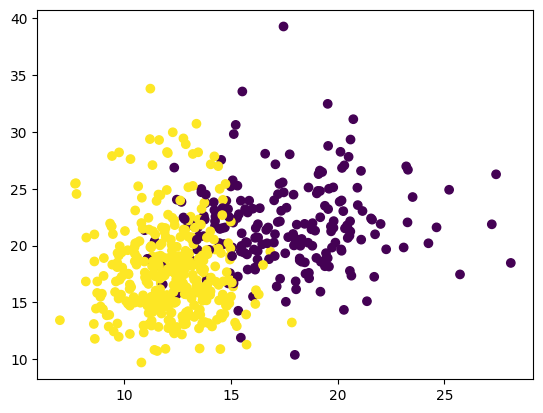

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=42)


In [5]:
Kernel = ["linear","poly","rbf","sigmoid"]
 
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.964912
0.9486048221588135
The accuracy under kernel poly is 0.964912
0.05408978462219238
The accuracy under kernel rbf is 0.631579
0.01794910430908203
The accuracy under kernel sigmoid is 0.631579
0.007696866989135742


可以使用属性clf.support_和clf.support_vectors_，观察训练得到的支持向量机的支持向量的索引和向量列表

* 乳腺癌数据集是一个线性数据集，线性核函数跑出来的效果很好。rbf和sigmoid两个擅长非线性的核函数数据从效果上来看并不好。

* 其次，线性核函数的运行速度远远不如非线性的两个核函数。

* 如果degree参数不为1，多项式核函数的运行时间很长。

* rbf核函数在线性数据上的结果不好，除了数据分布问题，真正的原因是数据的量纲问题。求解决策边界，判断点是否在决策边界的一边就是”距离“，因此严重受到数据量纲的影响。观察一下乳腺癌数据集的量纲：

In [6]:
import pandas as pd
data = pd.DataFrame(X)
data.describe( ).T#描述性统计
#从mean列和std列可以看出严重的量纲不统一
#这个时候就需要对数据进行标准化

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)#将数据转化为0,1正态分布
data = pd.DataFrame(X)
data.describe( ).T#均值很接近，方差为1了

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data,y,test_size=0.3,random_state=42)
 
Kernel = ["linear","poly","rbf","sigmoid"]
 
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.976608
0.008053779602050781
The accuracy under kernel poly is 0.988304
0.006090641021728516
The accuracy under kernel rbf is 0.970760
0.007791042327880859
The accuracy under kernel sigmoid is 0.970760
0.007366180419921875


量纲统一之后，可以观察到，所有核函数的运算时间都大大地减少了，rbf核函数也表现出了很好的结果。因此，SVM执行之前，推荐先进行数据的无量纲化！

### 4、交叉验证与调参

* 学习曲线

对于高斯径向基核函数，调整参数gamma的方式可以采用画学习曲线方式。

0.9824561403508771 0.004291934260128779


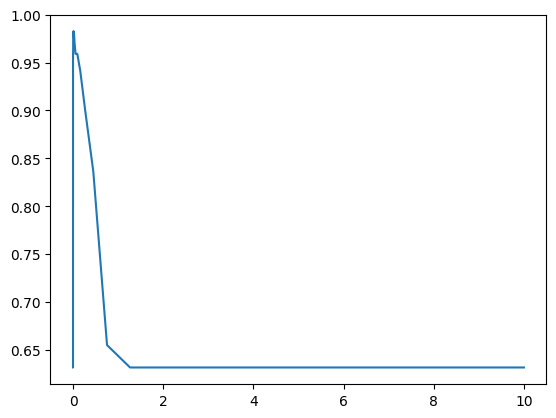

In [9]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

* 交叉验证

交叉验证是用来观察模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量。
![](https://ai-studio-static-online.cdn.bcebos.com/83cd756343d64d1eabbfd860dfd7081db4208bab733342d0ae21767507aa8268)

Scikit-learn中的交叉验证函数：

sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')

主要参数：

cv——确定交叉验证的数据划分策略。缺省默认是3-fold交叉验证，整数n：指定折数，或者是自定义的划分。

* 以上面调参后的高斯径向基rbf为例进行交叉验证，并观察交叉验证后的训练集结果。

In [10]:
clf = SVC(kernel="rbf",gamma = 0.004291934260128779,cache_size=5000).fit(Xtrain,Ytrain)
score = clf.score(Xtrain,Ytrain)
print(score)

0.9673366834170855


In [11]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel="rbf",gamma = 0.004291934260128779,cache_size=5000)
score_cv = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()
print(score_cv)

0.9546794871794871


* 交叉验证网格搜索

对于多项式核函数的调参来说，由于多个参数共同作用在一个分类器上影响它的效果，就比较复杂了。我们可以使用Scikit-learn中的交叉验证网格搜索来共同调整对多项式核函数有影响的参数。

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit#用于支持带交叉验证的网格搜索
from sklearn.model_selection import GridSearchCV#带交叉验证的网格搜索
 
time0 = time()
 
gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)
 
param_grid = dict(gamma = gamma_range
                  ,coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)#将数据分为5份，5份数据中测试集占30%
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000)
                    ,param_grid=param_grid
                    ,cv=cv)
grid.fit(X, y)
 
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, 
grid.best_score_))
print(time()-time0)


The best parameters are {'coef0': 0.0, 'gamma': 0.6951927961775619} with a score of 0.97778
8.016511917114258


#### 实验与讨论

* 用交叉验证法评价分类性能，对SVC的C参数进行调参，C的取值为[1,10，100,1000]，并根据结果分析参数C对分类器性能的影响。

* （选做）使用iris数据集，实现SVC的多类分类。参考例程https://scikit-learn.org/0.20/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py，比较不同核函数的结果，绘制2维下的决策面和支持向量。

##### 问题一
使用rbf作为核函数，5折交叉检验

C=1: 平均准确率=0.9736 (±0.0147)
C=10: 平均准确率=0.9772 (±0.0089)
C=100: 平均准确率=0.9579 (±0.0170)
C=1000: 平均准确率=0.9579 (±0.0170)


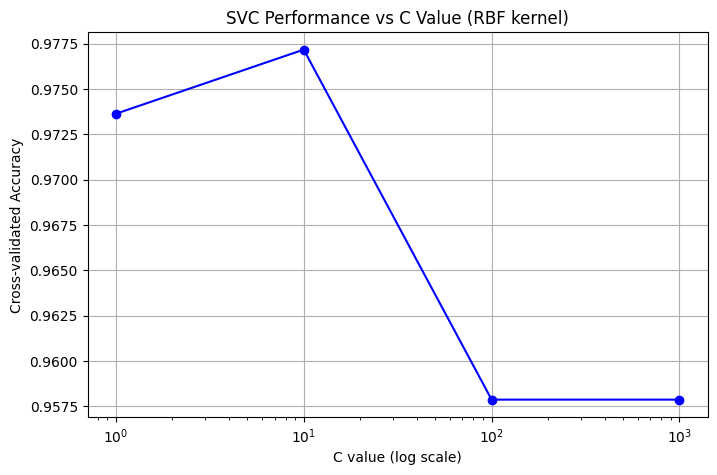


最佳C值: 10, 对应准确率: 0.9772


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
y = data.target

C_values = [1, 10, 100, 1000]
cv_scores = []

for C in C_values:
    clf = SVC(kernel='rbf', C=C, gamma='auto')
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores.append(scores.mean())
    print(f"C={C}: 平均准确率={scores.mean():.4f} (±{scores.std():.4f})")

plt.figure(figsize=(8, 5))
plt.plot(C_values, cv_scores, 'bo-')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Cross-validated Accuracy')
plt.title('SVC Performance vs C Value (RBF kernel)')
plt.grid(True)
plt.show()

best_idx = np.argmax(cv_scores)
best_C = C_values[best_idx]
print(f"\n最佳C值: {best_C}, 对应准确率: {cv_scores[best_idx]:.4f}")

#### 问题二
使用了4中核函数进行比较分析，分别为'linear','poly','rbf','sigmoid'四种，每个模型都是用默认的模型参数
##### linear
产生直线决策边界，适合线性可分数据
##### poly
产生曲线决策边界，可能更复杂
##### rbf
通常能产生最灵活的决策边界
##### sigmoid
类似神经网络激活函数，效果通常不如RBF

Kernel: linear  | Test Accuracy: 0.800
Kernel: poly    | Test Accuracy: 0.756
Kernel: rbf     | Test Accuracy: 0.733
Kernel: sigmoid | Test Accuracy: 0.778


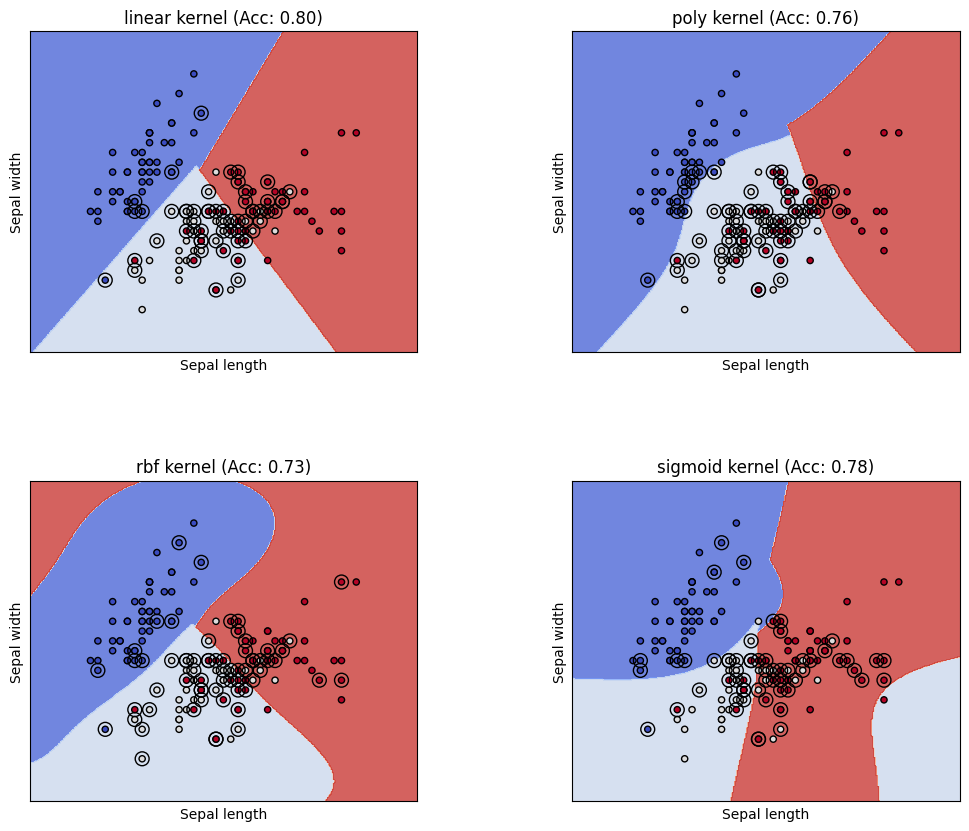

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [svm.SVC(kernel=kernel, gamma='auto') for kernel in kernels]

for kernel, model in zip(kernels, models):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Kernel: {kernel:<7} | Test Accuracy: {score:.3f}")

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, sub = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, kernels, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title} kernel (Acc: {clf.score(X_test, y_test):.2f})")
    
    sv = clf.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
plt.show()

### 三、实验结果与分析

（请给出实验内容中“实验与讨论”中的结果及其分析。）